In [1]:
#import sys
#!conda install --yes --prefix {sys.prefix} -c conda-forge pyregion

import numpy as np
from astropy.table import Table, vstack
import matplotlib.pyplot as plt 
import matplotlib.cm as cm # colormaps
import matplotlib.colors as colors
import astropy.io.fits as pyfits
from astropy.wcs import WCS
from matplotlib.patches import Circle
from matplotlib.patches import Ellipse

from astropy.modeling.models import Ellipse2D
from astropy.coordinates import Angle
from regions import PixCoord, EllipsePixelRegion, EllipseSkyRegion
from astropy.coordinates import SkyCoord
from astropy.wcs.utils import skycoord_to_pixel


from astropy import units as u

import pyregion

In [2]:
#Read in the catalog table
t = Table.read('J_A+A_591_A149_higalblu.dat.gz.fits', format='fits')



 Basic detection information                                                     [astropy.io.fits.card]
 Quality flags                                                                   [astropy.io.fits.card]
 Basic extraction information                                                    [astropy.io.fits.card]


In [3]:
t

rowid,Name,GLON,GLAT,e_GLON,e_GLAT,RAdeg,DEdeg,Image,Xpos,Ypos,e_Xpos,e_Ypos,Source,Fint,Fintc,e_Fintc,Fpeak,e_Fpeak,FWHMA,FWHMB,e_FWHMA,e_FWHMB,PA,e_PA,Bckg,Bckga,Bckgb,Bckgc,Bckgd,Bckge,Bckgf,rms,rmss,SNR,detX,detY,detX45,detY45,detlimX,detlimY,detlimx45,detlimy45,Clump,Ncomp,Xcent,Ycent,Xwin,Ywin,NCont,Cent,DOF,Chi2,Chi2O,fitst,Guess,Group,Constr,rd2dx,rd2dy,rd2dx45,rd2dy45,ovlap,ovflux
,,deg,deg,deg,deg,deg,deg,,pix,pix,pix,pix,,Jy,Jy,Jy,MJy / sr,MJy / sr,arcsec,arcsec,arcsec,arcsec,deg,deg,MJy / sr,MJy / sr,MJy / sr,MJy / (pix sr),MJy / (pix2 sr),MJy / (pix2 sr),MJy / (pix2 sr),MJy / sr,MJy / sr,,,,,,MJy / (pix2 sr),MJy / (pix2 sr),MJy / (pix2 sr),MJy / (pix2 sr),,,pix,pix,pix,pix,,pix,,,,,,,,,,,,,
int32,bytes22,float64,float64,float64,float64,float64,float64,bytes25,float64,float64,float64,float64,bytes9,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int16,int16,int16,int16,int16,int16,int16,float64,int16,float64,float64,int16,bytes2,bytes7,int16,float64,float64,float64,float64,bytes6,bytes2
1,HIGALPB067.4776+1.0183,67.477628,1.018342,0.00,0.00,299.28070,30.844111,HIGAL0661p052_070_RM.fits,186.500,2177.500,0.000,0.000,l066_0912,0.278,0.3459200,0.041,44.772,4.224,23.18,10.05,0.00,1.12,27.0,4.0,13.355,38.85536,14.96756,-16.74940,-1.16401,1.01730,0.00338,40.61170,42.71310,1.04820,5.296,2.800,3.912,5.467,9.455,8.955,9.411,9.581,0,1,185,2176,8,8,0,0.50,277,4700.0,45100.00,1,B2,0,2,0.297,0.424,0.313,0.545,H,0
2,HIGALPB067.4555+1.4990,67.455519,1.499024,0.00,0.00,298.78809,31.074537,HIGAL0661p052_070_RM.fits,211.499,2718.500,0.000,0.000,l066_0961,1.061,1.3905200,0.047,481.289,13.299,10.08,8.21,0.35,0.00,-139.9,6.0,-399.236,47.02908,-39.70042,-51.46395,4.30303,-0.00375,-0.52697,356.19000,362.63000,1.32722,10.368,7.013,6.160,8.856,90.448,90.427,84.708,89.427,0,1,210,2718,8,8,1,0.50,277,130000.0,141000.00,3,B2,0,2,0.190,0.257,0.496,0.325,H,0
3,HIGALPB067.4448+1.2236,67.444796,1.223611,0.00,0.00,299.05648,30.922749,HIGAL0661p052_070_RM.fits,223.500,2408.500,0.000,0.000,l066_0933,1.753,2.1954500,0.024,384.714,5.261,20.83,8.21,0.00,0.00,-197.5,0.6,-129.541,171.11519,-25.51685,-51.33861,1.78277,3.36393,-0.26623,82.65050,78.13070,4.92398,10.654,5.344,4.411,10.636,16.020,16.457,15.960,16.087,0,1,222,2407,8,8,0,0.50,277,15900.0,116000.00,1,B2,0,3,0.839,0.521,2.836,0.721,H,0
4,HIGALPB067.4438+0.8397,67.443828,0.839744,0.00,0.00,299.43762,30.722189,HIGAL0661p052_070_RM.fits,224.498,1976.500,0.000,0.000,l066_0847,0.662,0.8221020,0.028,83.820,2.126,22.86,12.96,0.00,0.44,58.8,2.0,-30.857,63.67584,-9.75289,-12.55237,0.47341,0.75295,0.06708,23.98800,23.19690,3.61341,6.860,3.893,8.577,9.600,10.238,9.853,9.810,9.793,0,1,224,1975,8,8,0,0.50,277,4130.0,26500.00,1,B2,0,2,0.142,0.439,0.180,0.350,H,0
5,HIGALPB067.4297+1.4897,67.429749,1.489713,0.00,0.30,298.78185,31.047671,HIGAL0661p052_070_RM.fits,240.498,2708.000,0.000,0.093,l066_0957,0.367,0.4921850,0.028,204.180,15.545,8.21,8.21,0.00,0.00,323.7,246.2,-74.704,-330.38043,61.92891,32.64973,-2.73333,-0.03522,-4.88574,280.84500,286.46500,0.71276,7.021,5.170,8.307,4.438,100.421,97.900,82.948,86.685,0,1,239,2707,8,8,0,0.50,277,46600.0,-111000.00,1,B2,0,2,0.156,0.202,0.224,0.350,H,0
6,HIGALPB067.3986+1.3534,67.398619,1.353354,0.00,0.00,298.89922,30.950509,HIGAL0661p052_070_RM.fits,275.499,2554.500,0.000,0.000,l066_0947,3.850,4.7880300,0.070,528.820,5.223,22.46,12.16,0.00,0.18,-233.4,0.8,-281.371,349.95676,-72.62196,-74.22683,4.36707,4.62122,-0.63246,126.30300,125.05100,4.22883,7.882,8.176,8.453,8.410,18.177,18.374,18.132,18.717,0,1,275,2554,8,8,0,0.50,277,19300.0,121000.00,1,B2,0,2,0.524,0.687,1.451,0.564,H,0
7,HIGALPB067.3967+0.7891,67.396723,0.789113,0.00,0.00,299.45926,30.655588,HIGAL0661p052_070_RM.fits,277.502,1919.500,0.000,0.000,l066_0836,1.130,1.4087100,0.019,225.767,3.715,22.88,8.21,0.00,0.00,-32.9,0.7,-105.351,102

In [4]:
#Filter the GLON range you want to be between
t_l_neg = t[np.where(t['GLON']> 359.22)]
t_l_pos = t[np.where(t['GLON']<1.23)]

t_l_filter = vstack([t_l_pos, t_l_neg])


#Filter the GLAT range you want
t_b_filter = t_l_filter[np.where(np.logical_and(t_l_filter['GLAT']<0.251, t_l_filter['GLAT']>-0.330))]

In [5]:

#Write this to a NEW catalog file! Yours will be named something DIFFERENT!
t_filtered = t_b_filter
t_filtered.write('higalblu_filtered.fits', format='fits', overwrite = True)

In [6]:
t_filtered

rowid,Name,GLON,GLAT,e_GLON,e_GLAT,RAdeg,DEdeg,Image,Xpos,Ypos,e_Xpos,e_Ypos,Source,Fint,Fintc,e_Fintc,Fpeak,e_Fpeak,FWHMA,FWHMB,e_FWHMA,e_FWHMB,PA,e_PA,Bckg,Bckga,Bckgb,Bckgc,Bckgd,Bckge,Bckgf,rms,rmss,SNR,detX,detY,detX45,detY45,detlimX,detlimY,detlimx45,detlimy45,Clump,Ncomp,Xcent,Ycent,Xwin,Ywin,NCont,Cent,DOF,Chi2,Chi2O,fitst,Guess,Group,Constr,rd2dx,rd2dy,rd2dx45,rd2dy45,ovlap,ovflux
,,deg,deg,deg,deg,deg,deg,,pix,pix,pix,pix,,Jy,Jy,Jy,MJy / sr,MJy / sr,arcsec,arcsec,arcsec,arcsec,deg,deg,MJy / sr,MJy / sr,MJy / sr,MJy / (pix sr),MJy / (pix2 sr),MJy / (pix2 sr),MJy / (pix2 sr),MJy / sr,MJy / sr,,,,,,MJy / (pix2 sr),MJy / (pix2 sr),MJy / (pix2 sr),MJy / (pix2 sr),,,pix,pix,pix,pix,,pix,,,,,,,,,,,,,
int32,bytes22,float64,float64,float64,float64,float64,float64,bytes25,float64,float64,float64,float64,bytes9,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int16,int16,int16,int16,int16,int16,int16,float64,int16,float64,float64,int16,bytes2,bytes7,int16,float64,float64,float64,float64,bytes6,bytes2
48876,HIGALPB001.2270+0.1639,1.227027,0.163914,0.00,0.00,266.96953,-27.802275,HIGAL0022n015_070_RM.fits,3066.500,2149.500,0.000,0.000,l002_1514,0.843,1.0535300,0.156,117.736,14.174,15.55,17.28,2.19,0.00,191.9,44.8,1308.827,1204.71021,9.81416,-6.68433,0.10284,0.90204,0.19835,28.77060,29.36410,4.00952,5.575,4.651,4.757,3.404,12.819,12.658,15.544,15.231,0,1,3065,2149,8,8,0,0.50,277,176.0,178.00,1,B2,0,3,0.254,0.399,0.554,0.686,W,0
48877,HIGALPB001.2251-0.2396,1.225072,-0.239568,0.73,0.00,267.35959,-28.012001,HIGAL0022n015_070_RM.fits,3068.680,1695.500,0.227,0.000,l002_0567,1.147,1.4302000,0.180,148.417,15.060,15.84,18.30,1.89,0.00,34.1,28.1,1578.572,1679.29382,-17.65694,-13.95195,0.87194,0.69370,0.91420,25.55790,25.06490,5.92133,3.790,3.830,5.870,5.961,12.563,12.204,15.838,14.880,0,1,3069,1696,8,8,0,1.50,277,115.0,115.00,1,A1,0,2,0.149,0.188,0.045,0.323,W,0
48880,HIGALPB001.2225-0.0020,1.222480,-0.002037,1.42,1.42,267.12759,-27.891874,HIGAL0022n015_070_RM.fits,3071.610,1962.770,0.444,0.443,l002_1229,0.157,0.2105530,0.050,87.440,27.736,8.21,8.21,0.00,0.00,10.9,0.0,2314.689,2469.63550,14.06198,-38.21682,-0.62513,1.44389,-0.29741,54.07670,57.08530,1.53175,6.067,5.546,6.035,4.490,14.320,14.521,17.868,20.262,0,1,3070,1962,8,8,1,1.50,277,724.0,339.00,1,B2,0,2,0.458,0.461,0.510,0.552,W,0
48881,HIGALPB001.2191-0.0289,1.219145,-0.028937,0.84,0.00,267.15172,-27.908607,HIGAL0022n015_070_RM.fits,3075.360,1932.500,0.263,0.000,l002_1155,0.908,1.1405400,0.181,160.621,20.440,12.27,17.28,1.88,0.00,-52.5,15.4,2486.599,2515.85010,-1.58362,-8.08213,1.40875,0.22369,-0.87140,48.67070,50.76120,3.16425,3.858,4.081,3.458,5.024,15.480,15.355,20.213,21.363,0,1,3074,1931,8,8,0,0.50,277,270.0,269.00,1,C2,0,2,0.701,0.555,0.699,0.753,W,0
48883,HIGALPB001.2181-0.1662,1.218125,-0.166216,0.00,0.74,267.28431,-27.980216,HIGAL0022n015_070_RM.fits,3076.500,1778.040,0.000,0.230,l002_0690,1.594,1.9760800,0.164,164.878,16.921,20.99,17.28,0.00,0.00,40.6,19.4,1969.627,1848.20068,0.40792,24.71681,0.15657,-0.50122,-0.94081,31.19890,32.96750,5.00123,3.890,5.063,5.354,3.237,13.951,13.194,16.176,18.811,0,1,3076,1777,8,8,0,0.50,277,142.0,142.00,1,B2,0,3,0.495,0.348,0.482,0.870,W,0
48884,HIGALPB001.2146+0.1175,1.214609,0.117501,0.52,0.53,267.00720,-27.836895,HIGAL0022n015_070_RM.fits,3080.470,2097.280,0.163,0.166,l002_1439,1.769,2.2062800,0.197,228.820,16.545,16.78,17.28,1.42,0.00,355.2,96.2,1849.873,1726.81262,13.84867,2.26145,-0.61598,0.74930,-0.20182,36.58950,37.46110,6.10820,2.812,5.706,5.347,5.121,14.081,13.994,16.163,16.854,0,1,3081,2096,8,8,0,1.50,277,203.0,203.00,1,C2,0,1,0.786,0.257,0.629,0.521,W,0
48892,HIGALPB001.1968-0.1996,1.196798,-0.199575,0.00,0.00,267.30427,-28.015671,HIGAL0022n015_070_RM.fits,3100.500,1740.500,0.000,0.000,l002_0639,0.402,0.5089270,0.161,89.413,18.925,14.95,11.30,3.56,2.

In [7]:
cloud_list = ["G359.475-0.044", "G359.508-0.135", "G359.561-0.001", "G359.595-0.223","G359.608+0.018",
              "G359.688-0.132", "G359.701+0.032", "G359.865+0.023", "G359.88-0.081", "G359.979-0.071", 
              "G0.014-0.016","G0.035+0.032", "G0.068-0.076", "G0.105-0.08", "G0.116+0.003","G0.143-0.083", 
              "G0.255+0.02", "G0.327-0.195", "G0.342+0.06",  "G0.342-0.085", "G0.379+0.05", "G0.413+0.048", 
              "G0.488+0.008", "G0.645+0.03",  "G0.666-0.028", "G0.716-0.09", "G0.816-0.185" , "G0.888-0.044",
              "G1.075-0.049", "G1.601+0.012", "G1.652-0.052"  ]

In [8]:
t_filtered[np.where(t_filtered['rowid'] == 50826)]

rowid,Name,GLON,GLAT,e_GLON,e_GLAT,RAdeg,DEdeg,Image,Xpos,Ypos,e_Xpos,e_Ypos,Source,Fint,Fintc,e_Fintc,Fpeak,e_Fpeak,FWHMA,FWHMB,e_FWHMA,e_FWHMB,PA,e_PA,Bckg,Bckga,Bckgb,Bckgc,Bckgd,Bckge,Bckgf,rms,rmss,SNR,detX,detY,detX45,detY45,detlimX,detlimY,detlimx45,detlimy45,Clump,Ncomp,Xcent,Ycent,Xwin,Ywin,NCont,Cent,DOF,Chi2,Chi2O,fitst,Guess,Group,Constr,rd2dx,rd2dy,rd2dx45,rd2dy45,ovlap,ovflux
,,deg,deg,deg,deg,deg,deg,,pix,pix,pix,pix,,Jy,Jy,Jy,MJy / sr,MJy / sr,arcsec,arcsec,arcsec,arcsec,deg,deg,MJy / sr,MJy / sr,MJy / sr,MJy / (pix sr),MJy / (pix2 sr),MJy / (pix2 sr),MJy / (pix2 sr),MJy / sr,MJy / sr,,,,,,MJy / (pix2 sr),MJy / (pix2 sr),MJy / (pix2 sr),MJy / (pix2 sr),,,pix,pix,pix,pix,,pix,,,,,,,,,,,,,
int32,bytes22,float64,float64,float64,float64,float64,float64,bytes25,float64,float64,float64,float64,bytes9,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int16,int16,int16,int16,int16,int16,int16,float64,int16,float64,float64,int16,bytes2,bytes7,int16,float64,float64,float64,float64,bytes6,bytes2
50826,HIGALPB000.4752-0.0101,0.475240,-0.010069,0.03,0.03,266.69663,-28.535471,HIGAL0000n015_070_RM.fits,1432.220,1947.370,0.009,0.008,l000_4095,21.591,28.1173000,0.264,8644.081,65.421,10.54,8.89,0.07,0.06,-146.5,1.4,4865.218,11358.48730,-554.99615,-950.13171,45.26647,37.30356,5.07683,584.98300,620.03600,13.94126,47.642,46.855,37.402,38.887,101.019,96.344,169.156,175.777,0,1,1431,1946,8,8,3,0.50,277,14700.0,9670.00,1,A1,0,0,0.820,0.828,0.794,0.866,H,0


In [9]:
arcsec_to_deg = 8.89E-4 / 3600 
arcsec_to_deg #deg/pix

2.469444444444445e-07

In [10]:
###Make function to subtract peak flux from 70um sources

def sub_70um_source(cloud, source_id):
    source = t_filtered[np.where(t_filtered['rowid'] == source_id)]
    
    cen_x = source['GLON'][0]
    cen_y = source['GLAT'][0]
    width =  source['FWHMA'][0] / 3600
    height = source['FWHMB'][0] /3600
    PA = source['PA'][0]
    Fpeak = source['Fpeak'][0]
    
    cloud_fits = pyfits.open('./Cloud_masks/{}/{}_herschel70um_cutout_isolated.fits'.format(cloud,cloud))[0]
    wcs = WCS(cloud_fits.header)
    
    ###plot the cloud and the ellipse of the source
    ax = plt.figure(figsize = (5,5))
    ax =plt.subplot(projection=wcs)
    data = cloud_fits.data
    im = ax.imshow(data, origin='lower', cmap ='gist_gray')
    ax.set_facecolor('pink')
    
    theta = Angle(PA, 'deg')
    e = Ellipse((cen_x, cen_y), width, height, theta.degree, edgecolor='yellow',
                          facecolor='none', transform=ax.get_transform('world') )
    ax.add_patch(e)
    ax.set_title("{}".format(cloud))
    plt.show()
    
    
    
    ###plot the cloud with a mask of the source
    ax2 = plt.figure(figsize = (5,5))
    ax2 =plt.subplot(projection=wcs)

    im = ax2.imshow(data, origin='lower', cmap ='gist_gray')
    ax2.set_facecolor('pink')

    cen_pix_loc = skycoord_to_pixel(SkyCoord(cen_x,cen_y, unit="deg", frame = 'galactic'), wcs, origin=0)
    skyreg = EllipseSkyRegion(SkyCoord(cen_x,cen_y, unit='deg', frame='galactic'), width*u.deg, height*u.deg, theta)

    reg = skyreg.to_pixel(wcs)
    mask = reg.to_mask(mode='exact')

    shaped_mask = mask.to_image(np.shape(cloud_fits)) #Reshape the mask to the full cloud image
    ax2.imshow(shaped_mask, cmap=plt.cm.plasma, interpolation='nearest', 
              origin='lower', alpha =0.5)
    ax2.set_title("{} overplot 70um source mask".format(cloud))
    plt.show()
    
    ###Subtract the peak flux from peak flux pixel, and replace all masked pixels with this value
    
    shaped_mask_ind = np.where(shaped_mask>0)
    fpeak_sub = np.max(data[shaped_mask_ind] - Fpeak)
    data[shaped_mask_ind] = fpeak_sub

    ax3 = plt.figure(figsize = (5,5))
    ax3 =plt.subplot(projection=wcs)
    im = ax3.imshow(data, origin='lower', cmap ='gist_gray')
    ax3.set_facecolor('pink')
    ax3.set_title("{} Subtracted source Fpeak".format(cloud))
    plt.show()
    
    return 




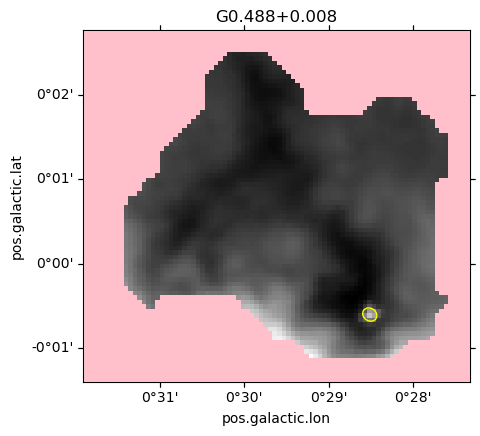

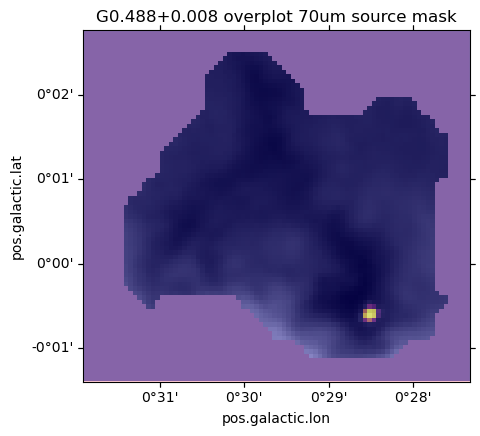

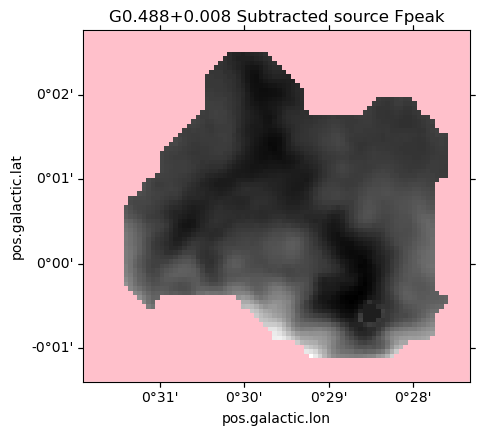

In [11]:
sub_70um_source("G0.488+0.008", 50826)

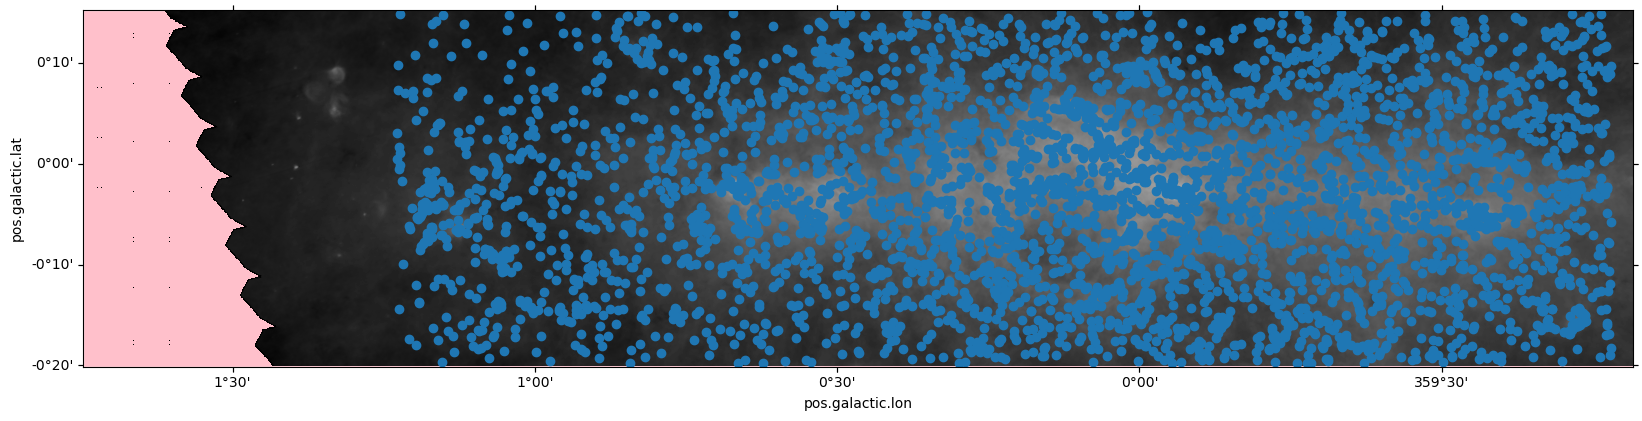

In [12]:
cloud_fits = pyfits.open('./FITS/destripe_l000_blue_wgls_rcal_cropped.fits')[0]
wcs = WCS(cloud_fits.header)


ax = plt.figure(figsize = (20,10))
ax =plt.subplot(projection=wcs)
data = cloud_fits.data
im = ax.imshow(data, origin='lower', cmap ='gist_gray', norm = colors.LogNorm())
ax.set_facecolor('pink')

plt.scatter(t_filtered['GLON'],t_filtered['GLAT'],transform=ax.get_transform('world'))


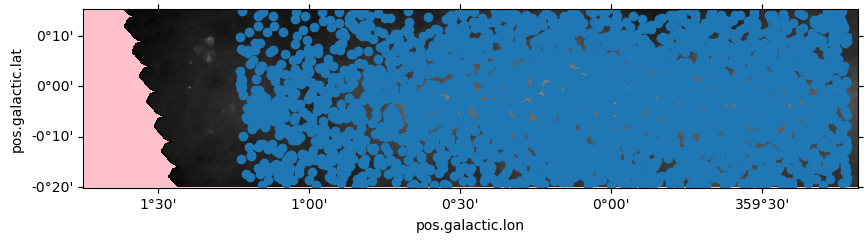

In [13]:
cloud_fits = pyfits.open('./FITS/destripe_l000_blue_wgls_rcal_cropped.fits')[0]
wcs = WCS(cloud_fits.header)

##Make lists of all of the relevant arguments
sources = t_filtered[np.where(t_filtered['rowid'])]

source_id = sources['rowid']
cen_x = sources['GLON']
cen_y = sources['GLAT']
width =  sources['FWHMA'] / 3600 #in deg/pix
height = sources['FWHMB'] /3600 #in deg/pix
PA = sources['PA']
Fpeak = sources['Fpeak']


ax = plt.figure(figsize = (10,10))
ax =plt.subplot(projection=wcs)
data = cloud_fits.data
im = ax.imshow(data, origin='lower', cmap ='gist_gray', norm = colors.LogNorm()) 
plt.scatter(cen_x,cen_y,transform=ax.get_transform('world'))


ax.set_facecolor('pink')

theta = Angle(PA, 'deg')




In [14]:
###REPLACE MASKS WITH PEAK FLUX - FPEAK OF 70UM SOURCE###
data = cloud_fits.data
e_list = []
fits_mask = np.zeros(np.shape(cloud_fits))
for i in np.arange(len(sources)):
    cen_pix_loc = skycoord_to_pixel(SkyCoord(cen_x[i],cen_y[i], unit="deg", frame = 'galactic'), wcs, origin=0)
    skyreg = EllipseSkyRegion(SkyCoord(cen_x[i],cen_y[i], unit='deg', frame='galactic'), width[i]*u.deg, height[i]*u.deg, theta[i])

    reg = skyreg.to_pixel(wcs)
    mask = reg.to_mask(mode='exact')

    shaped_mask = mask.to_image(np.shape(cloud_fits)) #Reshape the mask to the full cloud image
    
    shaped_mask_ind = np.where(shaped_mask>0)
    fits_mask[shaped_mask_ind] = shaped_mask[shaped_mask_ind]
    fpeak_sub = np.max(data[shaped_mask_ind] - Fpeak[i])
    data[shaped_mask_ind] = fpeak_sub
    

pyfits.writeto('./FITS/70um_sources_subtracted.fits', data, cloud_fits.header, overwrite=True)


In [15]:
###REPLACE MASKS WITH NANS###
data = cloud_fits.data
e_list = []
fits_mask = np.zeros(np.shape(cloud_fits))
for i in np.arange(len(sources)):
    cen_pix_loc = skycoord_to_pixel(SkyCoord(cen_x[i],cen_y[i], unit="deg", frame = 'galactic'), wcs, origin=0)
    skyreg = EllipseSkyRegion(SkyCoord(cen_x[i],cen_y[i], unit='deg', frame='galactic'), width[i]*u.deg, height[i]*u.deg, theta[i])

    reg = skyreg.to_pixel(wcs)
    mask = reg.to_mask(mode='exact')

    shaped_mask = mask.to_image(np.shape(cloud_fits)) #Reshape the mask to the full cloud image
    
    shaped_mask_ind = np.where(shaped_mask>0)
    fits_mask[shaped_mask_ind] = shaped_mask[shaped_mask_ind]
    data[shaped_mask_ind] = np.nan
    

pyfits.writeto('./FITS/70um_sources_to_nans.fits', data, cloud_fits.header, overwrite=True)


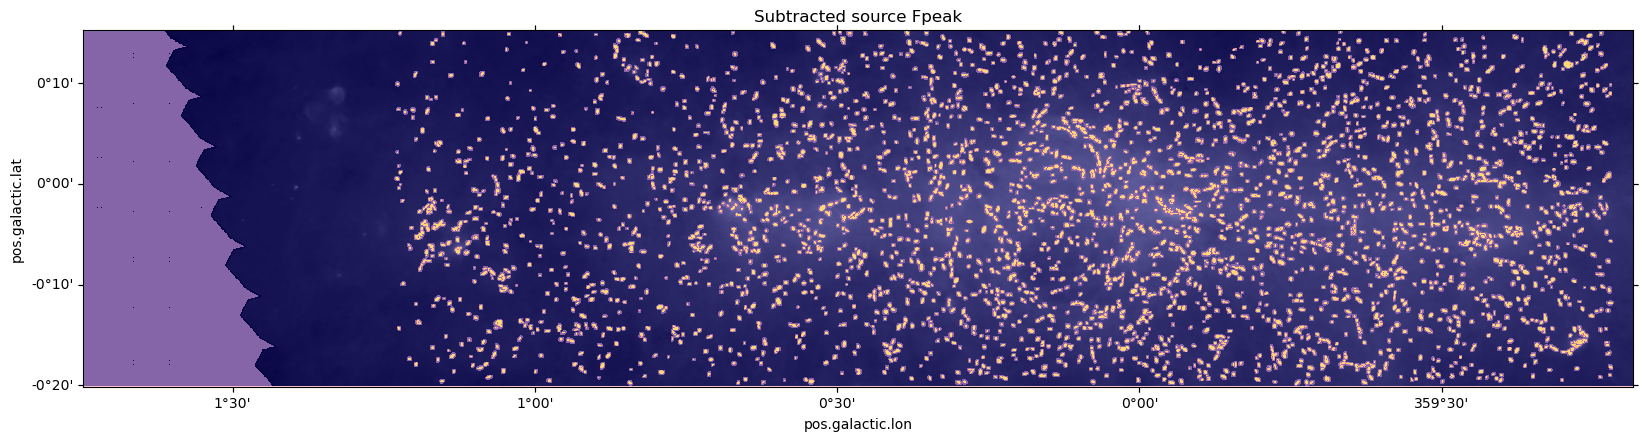

In [16]:
###Plot the full mask with all of the ellipses!
ax3 = plt.figure(figsize = (20,10))
ax3 =plt.subplot(projection=wcs)
im = ax3.imshow(data, origin='lower', cmap ='gist_gray', norm = colors.LogNorm()) 

ax3.imshow(fits_mask, cmap=plt.cm.plasma, interpolation='nearest', 
              origin='lower', alpha =0.5)
ax3.set_facecolor('pink')
ax3.set_title("Subtracted source Fpeak")

plt.show()


In [17]:
###REPLACE MASKS WITH NANS###
data = cloud_fits.data
e_list = []
fits_mask = np.zeros(np.shape(cloud_fits))
for i in np.arange(len(sources)):
    cen_pix_loc = skycoord_to_pixel(SkyCoord(cen_x[i],cen_y[i], unit="deg", frame = 'galactic'), wcs, origin=0)
    skyreg = EllipseSkyRegion(SkyCoord(cen_x[i],cen_y[i], unit='deg', frame='galactic'), width[i]*u.deg, height[i]*u.deg, theta[i])

    reg = skyreg.to_pixel(wcs)
    mask = reg.to_mask(mode='exact')

    shaped_mask = mask.to_image(np.shape(cloud_fits)) #Reshape the mask to the full cloud image
    
    shaped_mask_ind = np.where(shaped_mask>0)
    non_mask_ind = np.where(shaped_mask<0)
    fits_mask[shaped_mask_ind] = shaped_mask[shaped_mask_ind]
    
    data[shaped_mask_ind] = 1
    data[non_mask_ind] = 0
    

pyfits.writeto('./FITS/70um_sources_to_nans_mask.fits', data, cloud_fits.header, overwrite=True)


In [18]:
###REPLACE MASKS WITH NANS FOR LAST TWO CLOUDS###

t = Table.read('J_A+A_591_A149_higalblu.dat.gz.fits', format='fits')

#Filter the GLON range you want to be between
t_l_filter = t[np.where( (t['GLON']<1.789) & (t['GLON']>1.02))]


#Filter the GLAT range you want
t_b_filter = t_l_filter[np.where(np.logical_and(t_l_filter['GLAT']<0.251, t_l_filter['GLAT']>-0.330))]

t_filtered = t_b_filter



 Basic detection information                                                     [astropy.io.fits.card]
 Quality flags                                                                   [astropy.io.fits.card]
 Basic extraction information                                                    [astropy.io.fits.card]


In [19]:
t_filtered

rowid,Name,GLON,GLAT,e_GLON,e_GLAT,RAdeg,DEdeg,Image,Xpos,Ypos,e_Xpos,e_Ypos,Source,Fint,Fintc,e_Fintc,Fpeak,e_Fpeak,FWHMA,FWHMB,e_FWHMA,e_FWHMB,PA,e_PA,Bckg,Bckga,Bckgb,Bckgc,Bckgd,Bckge,Bckgf,rms,rmss,SNR,detX,detY,detX45,detY45,detlimX,detlimY,detlimx45,detlimy45,Clump,Ncomp,Xcent,Ycent,Xwin,Ywin,NCont,Cent,DOF,Chi2,Chi2O,fitst,Guess,Group,Constr,rd2dx,rd2dy,rd2dx45,rd2dy45,ovlap,ovflux
,,deg,deg,deg,deg,deg,deg,,pix,pix,pix,pix,,Jy,Jy,Jy,MJy / sr,MJy / sr,arcsec,arcsec,arcsec,arcsec,deg,deg,MJy / sr,MJy / sr,MJy / sr,MJy / (pix sr),MJy / (pix2 sr),MJy / (pix2 sr),MJy / (pix2 sr),MJy / sr,MJy / sr,,,,,,MJy / (pix2 sr),MJy / (pix2 sr),MJy / (pix2 sr),MJy / (pix2 sr),,,pix,pix,pix,pix,,pix,,,,,,,,,,,,,
int32,bytes22,float64,float64,float64,float64,float64,float64,bytes25,float64,float64,float64,float64,bytes9,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int16,int16,int16,int16,int16,int16,int16,float64,int16,float64,float64,int16,bytes2,bytes7,int16,float64,float64,float64,float64,bytes6,bytes2
48641,HIGALPB001.7787-0.2837,1.778665,-0.283742,0.32,0.31,267.72346,-27.559476,HIGAL0022n015_070_RM.fits,2445.770,1645.840,0.100,0.097,l002_0513,0.916,1.1704800,0.108,255.679,16.753,10.39,12.95,0.72,0.89,-228.0,11.3,847.382,814.67883,3.03803,9.58934,-0.13020,-0.59910,-0.35132,17.64820,17.96330,14.23342,12.502,12.861,16.508,15.761,10.306,10.623,10.865,11.686,0,1,2445,1645,8,8,0,0.50,277,106.0,107.00,1,A1,0,0,0.764,0.683,0.740,0.914,H,0
48644,HIGALPB001.7691+0.0573,1.769135,0.057274,0.00,0.00,267.38800,-27.392739,HIGAL0022n015_070_RM.fits,2456.500,2029.500,0.000,0.000,l002_1342,2.430,3.0057100,0.179,231.882,17.128,22.76,17.28,0.00,0.00,28.3,8.4,1265.568,1269.48962,8.18828,-1.03162,-0.24902,-0.19738,-0.34923,31.27070,32.55090,7.12366,5.580,4.418,3.129,7.140,12.814,12.153,14.548,14.178,0,2,2455,2029,10,10,0,0.50,425,372.0,371.00,1,A2,31125,4,0.771,0.606,1.647,0.916,H,0
48646,HIGALPB001.7594-0.1537,1.759352,-0.153662,0.00,0.28,267.58632,-27.509429,HIGAL0022n015_070_RM.fits,2467.500,1792.190,0.000,0.087,l002_0725,0.837,1.0869700,0.096,316.181,20.690,10.49,9.47,0.70,0.63,75.1,24.0,934.245,1021.34448,-3.78927,-7.37299,-0.07781,0.28308,-0.21030,23.48830,22.83050,13.84904,14.505,13.830,18.485,16.857,10.614,10.804,11.895,11.868,0,1,2467,1791,8,8,0,0.50,277,168.0,167.00,1,B2,0,1,0.809,0.860,0.873,0.951,H,0
48647,HIGALPB001.7581-0.2589,1.758135,-0.258857,1.11,0.00,267.68749,-27.564373,HIGAL0022n015_070_RM.fits,2468.870,1673.840,0.348,0.000,l002_0541,0.665,0.8275120,0.137,80.749,10.826,19.88,15.55,0.00,2.44,21.3,21.2,839.688,876.23077,-7.67179,-1.97749,0.41500,0.00543,0.20951,17.03200,17.16860,4.70327,3.473,2.536,2.005,2.849,10.499,10.652,10.751,11.778,0,1,2469,1674,8,8,0,1.50,277,97.2,97.40,1,C2,0,2,0.302,0.294,0.499,0.731,H,0
48648,HIGALPB001.7576+0.0347,1.757579,0.034675,0.00,0.31,267.40314,-27.414268,HIGAL0022n015_070_RM.fits,2469.500,2004.070,0.000,0.097,l002_1303,5.114,6.2540600,0.469,275.310,21.625,40.68,17.13,0.00,0.81,-193.8,1.7,1335.940,1269.12036,5.67132,17.43592,-0.12867,-1.12770,-0.28739,34.61450,36.06010,7.63475,7.387,5.277,9.557,5.272,12.299,12.062,13.747,13.349,0,2,2469,2002,10,10,0,0.50,425,405.0,412.00,1,B2,28203,2,0.595,0.216,0.760,0.475,H,0
48649,HIGALPB001.7549+0.0325,1.754913,0.032454,0.00,0.30,267.40374,-27.417697,HIGAL0022n015_070_RM.fits,2472.500,2001.580,0.000,0.094,l002_1301,0.652,0.8089870,0.238,77.956,23.059,22.96,13.66,0.00,2.91,14.4,19.2,1348.051,1277.39209,6.08448,14.93373,-0.19407,-1.00321,-0.27393,31.59650,29.85960,2.61075,4.441,4.720,7.793,3.942,12.299,12.062,13.747,13.349,0,2,2469,2002,10,10,0,1.50,425,326.0,328.00,1,B2,27966,2,0.910,0.310,0.744,0.995,H,0
48659,HIGALPB001.7220-0.1715,1.722023,-0.171527,0.00,0.59,267.58203,-27.550638,HIGAL0022n015_070_RM.fits,2509.500,1772.080,0.000,0.184,l002_0684,0.693,0.8640500,0.133,108.859,13.

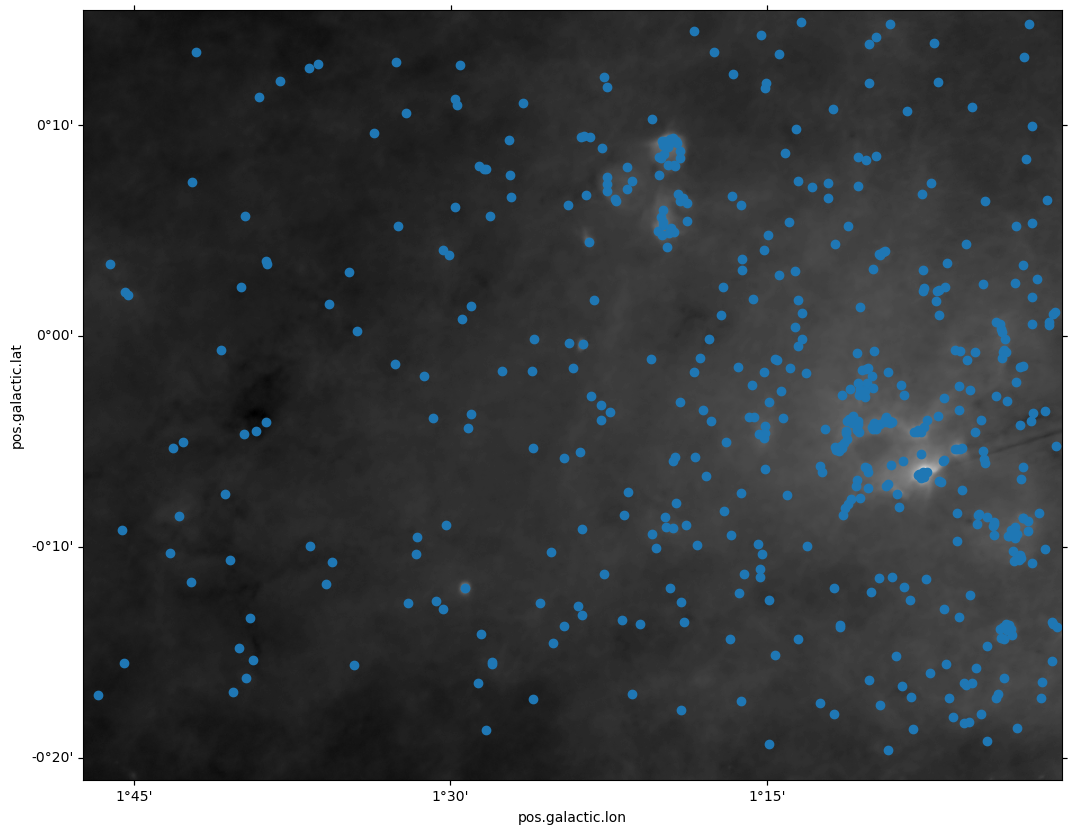

In [20]:
cloud_fits = pyfits.open('./FITS/destripe_l002_blue_wgls_rcal_cropped_small.fits')[0]
wcs = WCS(cloud_fits.header)


ax = plt.figure(figsize = (20,10))
ax =plt.subplot(projection=wcs)
data = cloud_fits.data
im = ax.imshow(data, origin='lower', cmap ='gist_gray', norm = colors.LogNorm())
ax.set_facecolor('pink')

plt.scatter(t_filtered['GLON'],t_filtered['GLAT'],transform=ax.get_transform('world'))

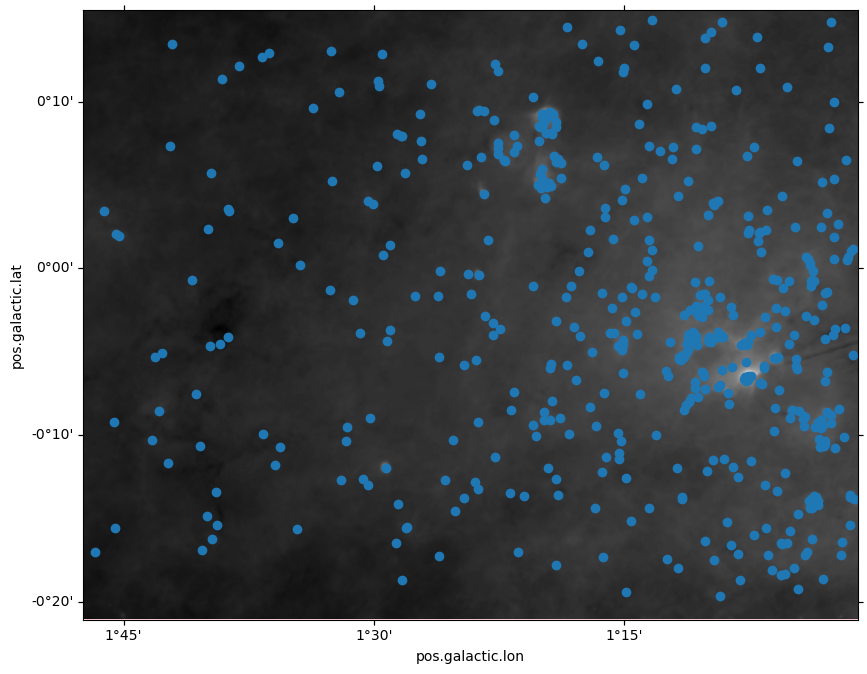

In [21]:
cloud_fits_l2 = pyfits.open('./FITS/destripe_l002_blue_wgls_rcal_cropped_small.fits')[0]
wcs_l2 = WCS(cloud_fits_l2.header)

##Make lists of all of the relevant arguments
sources = t_filtered[np.where(t_filtered['rowid'])]

source_id = sources['rowid']
cen_x = sources['GLON']
cen_y = sources['GLAT']
width =  sources['FWHMA'] / 3600 #in deg/pix
height = sources['FWHMB'] /3600 #in deg/pix
PA = sources['PA']
Fpeak = sources['Fpeak']


ax = plt.figure(figsize = (10,10))
ax =plt.subplot(projection=wcs_l2)
data = cloud_fits_l2.data
im = ax.imshow(data, origin='lower', cmap ='gist_gray', norm = colors.LogNorm()) 
plt.scatter(cen_x,cen_y,transform=ax.get_transform('world'))


ax.set_facecolor('pink')

theta = Angle(PA, 'deg')

In [22]:


data = cloud_fits_l2.data
e_list = []
fits_mask = np.zeros(np.shape(cloud_fits_l2))
for i in np.arange(len(sources)):
    cen_pix_loc = skycoord_to_pixel(SkyCoord(cen_x[i],cen_y[i], unit="deg", frame = 'galactic'), wcs_l2, origin=0)
    skyreg = EllipseSkyRegion(SkyCoord(cen_x[i],cen_y[i], unit='deg', frame='galactic'), width[i]*u.deg, height[i]*u.deg, theta[i])

    reg = skyreg.to_pixel(wcs_l2)
    mask = reg.to_mask(mode='exact')

    shaped_mask = mask.to_image(np.shape(cloud_fits_l2)) #Reshape the mask to the full cloud image
    
    shaped_mask_ind = np.where(shaped_mask>0)
    fits_mask[shaped_mask_ind] = shaped_mask[shaped_mask_ind]
    data[shaped_mask_ind] = np.nan
    

pyfits.writeto('./FITS/70um_sources_to_nans_l2.fits', data, cloud_fits_l2.header, overwrite=True)


In [30]:
###REPLACE MASKS WITH NANS###
data = cloud_fits_l2.data
e_list = []
fits_mask = np.zeros(np.shape(cloud_fits_l2))
for i in np.arange(len(sources)):
    cen_pix_loc = skycoord_to_pixel(SkyCoord(cen_x[i],cen_y[i], unit="deg", frame = 'galactic'), wcs_l2, origin=0)
    skyreg = EllipseSkyRegion(SkyCoord(cen_x[i],cen_y[i], unit='deg', frame='galactic'), width[i]*u.deg, height[i]*u.deg, theta[i])

    reg = skyreg.to_pixel(wcs_l2)
    mask = reg.to_mask(mode='exact')
    shaped_mask = mask.to_image(np.shape(cloud_fits_l2)) #Reshape the mask to the full cloud image
    shaped_mask_ind = np.where(shaped_mask>0)
    non_mask_ind = np.where(shaped_mask<0)
    fits_mask[shaped_mask_ind] = shaped_mask[shaped_mask_ind]
    
    data[shaped_mask_ind] = 1
    data[shaped_mask_ind == False] = 0
    

pyfits.writeto('./FITS/70um_sources_to_nans_l2_mask.fits', data, cloud_fits_l2.header, overwrite=True)


[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ...

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ...

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ...

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ...

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ...

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ...

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ...

KeyboardInterrupt: 